IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417392830334,37.7909741243888,"(37.7909741243888, -122.417392830334)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404417620748,37.7963018736036,"(37.7963018736036, -122.404417620748)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406958660602,37.7894347630337,"(37.7894347630337, -122.406958660602)"
,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419671780296,37.7650501214965,"(37.7650501214965, -122.419671780296)"
Aqui
0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64
<class 'numpy.int

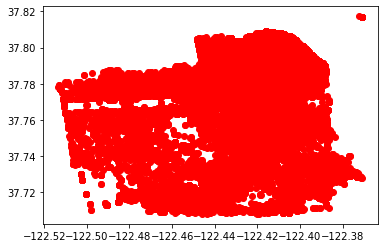

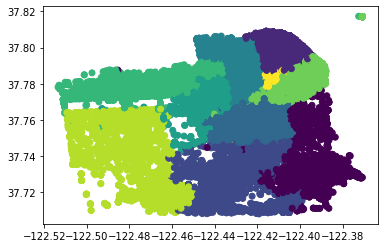

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [ ]:
#Codigo de Daniel Camilo Bernal Ternera
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

dataset_path = '/Map-Crime_Incidents-Previous_Three_Months.csv'
SF = pd.read_csv(dataset_path)

!head -n 5 /Map-Crime_Incidents-Previous_Three_Months.csv

pd.set_option('display.max_rows',10)
SF

SF.columns

len(SF)

SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

print("Aqui")


print(SF['Month'][0:2])
print(SF['Day'][0:2])

print(type(SF['Month'][0]))

del SF['IncidntNum']

SF.drop('Location', axis=1, inplace=True )

SF.columns

CountCategory = SF['Category'].value_counts()
print(CountCategory)

SF['Category'].value_counts(ascending=True)

print(SF['Category'].value_counts(ascending=True))

AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

len(AugustCrimes)

AugustCrimesB = SF[SF['Category'] == 'BURGLARY']
len(AugustCrimesB)


Crime0704 = SF.query('Month == 7 and Day == 4')
Crime0704


print(SF.columns)
print("AQUI")


plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()



pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))
color_dict

map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip(SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
  folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2], radius=10).add_to(map_osm)

map_osm

